In [149]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import hvplot.pandas
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the csv data file as data_df
data_df = pd.read_csv("data/Billionaires Statistics Dataset.csv")
data_df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


# Clean Data

In [3]:
# Convert gdp_country to float
data_df['gdp_country']= data_df['gdp_country'].replace('[\$,]', '', regex=True).astype(float)
# Convert unit of measurement
data_df['finalWorth'] = round(data_df['finalWorth']/1000,1)
data_df['gdp_country'] = round(data_df['gdp_country']/1000000000,1)
data_df['population_country'] = round(data_df['population_country']/1000000,1)
data_df['age'] = round(data_df['age'])
data_df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211.0,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,2715.5,65.6,102.5,82.5,24.2,60.7,67.1,46.227638,2.213749
1,2,180.0,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328.2,37.090240,-95.712891
2,3,114.0,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328.2,37.090240,-95.712891
3,4,107.0,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328.2,37.090240,-95.712891
4,5,106.0,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,21427.7,88.2,101.8,78.5,9.6,36.6,328.2,37.090240,-95.712891


In [4]:
# Checking rows that contain nan value
#data_df[data_df.isna().any(axis=1)]
#data_df.isnull().sum()

In [139]:
# Selecting features that are needed
full_df = data_df[['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
    'source', 'industries', 'countryOfCitizenship','selfMade', 'status', 'gender', 'lastName', 'firstName',
       'cpi_country', 
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country']]
full_df.columns = ['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
    'source', 'industries', 'countryOfCitizenship','selfMade', 'status', 'gender', 'lastName', 'firstName',
       'cpi_country', 'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country']

#Checking null cells
# full_df.isnull()

In [6]:
# Fill in missing age with median age
agedata = full_df.notna()
agedata = full_df[agedata]
median_age = agedata["age"].median()
median_age
full_df['age'] = full_df['age'].fillna(value = median_age)

/var/folders/jn/000q98496_9_y7jg5hj5hvw40000gn/T/ipykernel_44620/3367124917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['age'] = full_df['age'].fillna(value = median_age)


In [7]:
# Fill in null country with country of citizenship
full_df['country'].fillna(full_df['countryOfCitizenship'], inplace=True)

/var/folders/jn/000q98496_9_y7jg5hj5hvw40000gn/T/ipykernel_44620/1471971776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['country'].fillna(full_df['countryOfCitizenship'], inplace=True)


In [8]:
# Fill in null cpi_country with real-time value
for index, row in full_df.iterrows():
    if(row["country"]=='Hong Kong'):
        full_df.at[index, "cpi_country"] = 105.3
    if(row["country"]=='Uzbekistan'):
        full_df.at[index, "cpi_country"] = 209.90 
    if(row["country"]=='Taiwan'):
        full_df.at[index, "cpi_country"] = 105.63
    if(row["country"]=='Eswatini (Swaziland)'):
        full_df.at[index, "cpi_country"] = 174.42
    if(row["country"]=='Bahamas'):
        full_df.at[index, "cpi_country"] = 121.79
    if(row["country"]=='Cayman Islands'):
        full_df.at[index, "cpi_country"] = 130.6
    if(row["country"]=='Bermuda'):
        full_df.at[index, "cpi_country"] = 105.3
    if(row["country"]=='Ireland'):
        full_df.at[index, "cpi_country"] = 121.1
    if(row["country"]=='Liechtenstein'):
        full_df.at[index, "cpi_country"] = 91.8
    if(row["country"]=='Andorra'):
        full_df.at[index, "cpi_country"] = 112.92
    if(row["country"]=='Monaco'):
        full_df.at[index, "cpi_country"] = 122.1
#     if(row["country"]=='Guernsey'):
#         full_df.at[index, "cpi_country"] = 122.1
#     if(row["country"]=='British Virgin Islands'):
#         full_df.at[index, "cpi_country"] = 122.1
#     if(row["country"]=='Turks and Caicos Island'):
#         full_df.at[index, "cpi_country"] = 122.1

In [9]:
# Find the missing values for gdp_country
missing_gdp = {'country':['Hong Kong', 'Germany', 'Taiwan', 'Eswatini (Swaziland)', 'India',
       'Bahamas', 'Cayman Islands', 'United Kingdom', 'Bermuda',
       'British Virgin Islands', 'Mexico', 'Belgium', 'Ireland', 'Italy',
       'Guernsey', 'France', 'Turks and Caicos Islands', 'Czech Republic',
       'United States', 'South Korea', 'Peru', 'Malaysia', 'Austria',
       'Panama', 'Japan'],
                'gdp': [372.8, 3845.6, 761.7, 4.9, 2611.0, 12.7, 5.9, 2827.1, 7.6, 1.1, 1414.2, 579.1, 533.6, 
                        1862, 0.004, 2778.1, 1.1, 295.6, 21427.7, 2029.0, 226.8, 364.7, 446.3, 76.5, 5081.7]}

# Fill in null gdp_country with real-time value
counter = 0
for i in missing_gdp['country']:
    for index, row in full_df.iterrows():
        if (row["country"]==i):
            full_df.at[index, "gdp_country"] = missing_gdp['gdp'][counter]
    counter = counter + 1

In [10]:
# Find the missing values for gross_tertiary_education_enrollment
missing_tertiary = {'country':['Hong Kong', 'Monaco', 'Germany', 'Taiwan', 'Eswatini (Swaziland)',
       'India', 'Bahamas', 'Cayman Islands', 'United Kingdom', 'Bermuda',
       'British Virgin Islands', 'Mexico', 'Belgium', 'Ireland', 'Italy',
       'Guernsey', 'France', 'Turks and Caicos Islands', 'Czech Republic',
       'United States', 'South Korea', 'Peru', 'Andorra', 'Malaysia',
       'Austria', 'Panama', 'Japan'],
              'gross_tertiary_education_enrollment': [50.6, 100, 70.2, 48, 6.75, 28.1, 15.1,
                    25.9, 65.8, 19.0, 39.9, 40.2, 79.7, 75.2, 61.9, 1.0, 65.6, 1.0, 64.1, 88.2,
                    94.3, 70.7, 1, 45.1, 85.1, 47.8, 63.2]
                   }
# Fill in null gross_tertiary_education_enrollment with real-time value
counter = 0
for i in missing_tertiary['country']:
    for index, row in full_df.iterrows():
        if (row["country"]==i):
            full_df.at[index, "gross_tertiary_education_enrollment"] = missing_tertiary['gross_tertiary_education_enrollment'][counter]
    counter = counter + 1

In [11]:
# Find the missing values for gross_primary_education_enrollment_country
missing_primary = {'country':['Hong Kong', 'Monaco', 'Germany', 'Taiwan', 'Eswatini (Swaziland)',
       'India', 'Bahamas', 'Cayman Islands', 'United Kingdom', 'Bermuda',
       'British Virgin Islands', 'Mexico', 'Belgium', 'Ireland', 'Italy',
       'Guernsey', 'France', 'Turks and Caicos Islands', 'Czech Republic',
       'United States', 'South Korea', 'Peru', 'Malaysia', 'Austria',
       'Panama', 'Japan'],
              'gross_primary_education_enrollment_country': [107.8, 130.9, 104.0, 100, 114.5, 113, 92.0, 
                                                      93.2, 101.2, 101.0, 93.5, 105.8, 103.9, 101.4,
                                                      101.9, 100, 102.5, 122.34, 100.7, 101.8,
                                                      98.1, 106.9, 105.3, 103.1, 101.5, 98.8]}

# Fill in null gross_primary_education_enrollment_country with real-time value
counter = 0
for i in missing_primary['country']:
    for index, row in full_df.iterrows():
        if (row["country"]==i):
            full_df.at[index, "gross_primary_education_enrollment_country"] = missing_primary['gross_primary_education_enrollment_country'][counter]
    counter = counter + 1

In [12]:
# Find the missing values for life_expectancy_country
missing_life = {'country':['Hong Kong', 'Monaco', 'Germany', 'Taiwan', 'Eswatini (Swaziland)',
       'India', 'Bahamas', 'Cayman Islands', 'United Kingdom', 'Bermuda',
       'British Virgin Islands', 'Mexico', 'Belgium', 'Ireland', 'Italy',
       'Guernsey', 'France', 'Turks and Caicos Islands', 'Czech Republic',
       'United States', 'South Korea', 'Peru', 'Andorra', 'Malaysia',
       'Austria', 'Panama', 'Japan'],
              'life_expectancy_country': [85.4, 89.5, 80.9, 81.0, 59.7, 69.4, 72.7, 82.2, 81.3, 
                                          82.1, 75.9, 75.0, 81.6, 82.2, 82.9, 82.9, 82.5, 75,79,
                                          78.5, 82.6, 76.5, 81.2, 76, 81.6, 76.7, 84.2]}

# Fill in null life_expectancy_country with real-time value
counter = 0
for i in missing_life['country']:
    for index, row in full_df.iterrows():
        if (row["country"]==i):
            full_df.at[index, "life_expectancy_country"] = missing_life['life_expectancy_country'][counter]
    counter = counter + 1

In [13]:
# Find the missing values for population_country
missing_population = {'country':['Hong Kong', 'Germany', 'Taiwan', 'Eswatini (Swaziland)', 'India',
       'Bahamas', 'Cayman Islands', 'United Kingdom', 'Bermuda',
       'British Virgin Islands', 'Mexico', 'Belgium', 'Ireland', 'Italy',
       'Guernsey', 'France', 'Turks and Caicos Islands', 'Czech Republic',
       'United States', 'South Korea', 'Peru', 'Malaysia', 'Austria',
       'Panama', 'Japan'],
              'population_country': [7.4, 8.3, 23.6, 1.2, 136.6, 0.04, 0.006, 6.7, 0.006, 0.003,
                                    12.6, 1.1, 5.0, 6.0, 0.006, 6.7, 0.005, 1.1, 32.8, 5.2, 3.3,
                                    3.2, 0.9, 4.4, 12.6]}

# Fill in null population_country with real-time value
counter = 0
for i in missing_population['country']:
    for index, row in full_df.iterrows():
        if (row["country"]==i):
            full_df.at[index, "population_country"] = missing_population['population_country'][counter]
    counter = counter + 1

In [14]:
# Find the missing values for latitude_country
missing_latitude = {'country':['Hong Kong', 'Germany', 'Taiwan', 'Eswatini (Swaziland)', 'India',
       'Bahamas', 'Cayman Islands', 'United Kingdom', 'Bermuda',
       'British Virgin Islands', 'Mexico', 'Belgium', 'Ireland', 'Italy',
       'Guernsey', 'France', 'Turks and Caicos Islands', 'Czech Republic',
       'United States', 'South Korea', 'Peru', 'Malaysia', 'Austria',
       'Panama', 'Japan'],
                 'latitude_country': [22.396428, 51.165691, 23.69781, -26.522503, 20.593684,
                                      25.03428, 19.3133, 55.378051, 32.321384, 18.420695, 
                                      23.634501, 50.850346, 53.349805, 41.87194, 41.87194, 
                                      49.465691, 46.603354, 21.694025, 49.817492, 37.09024, 
                                      35.907757, 35.907757, -9.190347, 4.210484, 47.516231, 
                                      8.982379, 36.204824],
                 'longitude_country': [114.109497, 10.451526, 120.960515, 31.465866, 78.96288, 
                                       -77.39628, -81.2546, -3.435973, -64.750459, -64.61317, 
                                       -102.552788, 4.351721, -6.260309, 12.56738, 12.56738, 
                                       -2.293241, 1.888334, -71.797928, 15.472962, -95.712891, 
                                       -78.561083, 128.60957, -75.015152, 101.975766, 14.550072, 
                                       -80.782127]}

# Fill in null latitude_country with real-time value
counter = 0
for i in missing_latitude['country']:
    for index, row in full_df.iterrows():
        if (row["country"]==i):
            full_df.at[index, "latitude_country"] = missing_latitude['latitude_country'][counter]
            full_df.at[index, "longitude_country"] = missing_latitude['longitude_country'][counter]
    counter = counter + 1

In [140]:
# Fill in null gdp_country with real-time value
# df = full_df[full_df["latitude_country"].isnull()]
# df.country.unique()        

array(['Hong Kong', nan, 'Taiwan', 'Eswatini (Swaziland)', 'Bahamas',
       'Cayman Islands', 'Bermuda', 'British Virgin Islands', 'Ireland',
       'Guernsey', 'Turks and Caicos Islands'], dtype=object)

# General Informations About Billionaires Distributions

In [181]:
# Geographical distribution
# Configure the map
map_plot_1 = full_df.hvplot.points(
    "longitude_country",
    "latitude_country",
    geo = True,
    tiles = "EsriStreet",
    size = 'rank',
     color = 'countries',
    alpha = 0.5,
    frame_width = 800,
    frame_height = 600   
)

# Display the map plot
map_plot_1


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude_country,latitude_country]   (rank)

## Distribution of Billionaires by Country

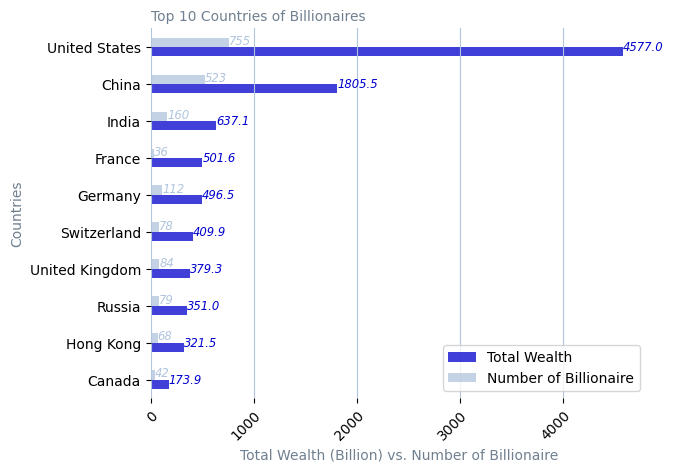

In [18]:
# Billionaires by countries --- bar chart
country_wealth_df = full_df[['finalWorth','country']].groupby('country').sum()
country_count_df = full_df[['finalWorth','country']].groupby('country').count()
country_df = pd.merge(country_wealth_df, country_count_df, on = 'country', how = 'outer', suffixes = ('_value', '_count') )
country_df = country_df.sort_values(by = 'finalWorth_value', ascending = True)

bottom_country_df = country_df.head(10)
top_country_df = country_df.tail(10)

# multi barh plot for top 10 countries
top_country_df.plot.barh(color = ('mediumblue','lightsteelblue'), alpha = 0.75, align = 'center')

plt.title("Top 10 Countries of Billionaires", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion) vs. Number of Billionaire", color = 'slategray',fontsize=10)
plt.ylabel("Countries", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.legend(labels = ('Total Wealth','Number of Billionaire'))
# annotate for total wealth
for index, value in enumerate(top_country_df['finalWorth_value']):
    plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'mediumblue') 
# annotate for count
for index, value in enumerate(top_country_df['finalWorth_count']):
    plt.text(value, index, str(value), ha = 'left', va = 'bottom', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'lightsteelblue') 
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()


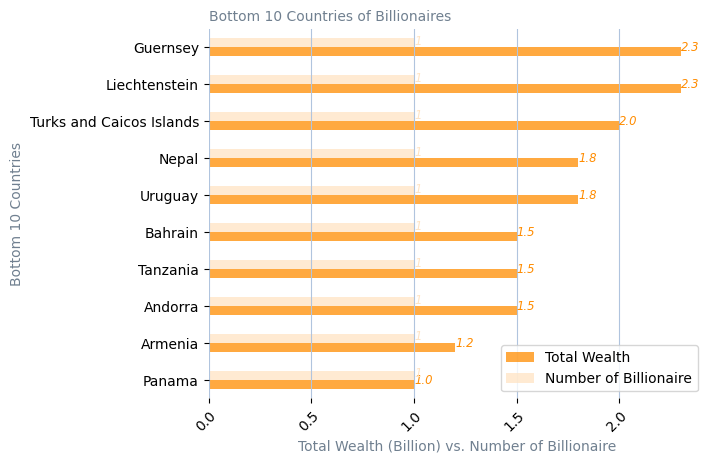

In [19]:
# multi barh plot fot bottom 10 countries
bottom_country_df.plot.barh(color = ('darkorange','bisque'), alpha = 0.75, align = 'center')

plt.title("Bottom 10 Countries of Billionaires", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion) vs. Number of Billionaire", color = 'slategray',fontsize=10)
plt.ylabel("Bottom 10 Countries", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.legend(labels = ('Total Wealth','Number of Billionaire'))
# annotate for total wealth
for index, value in enumerate(bottom_country_df['finalWorth_value']):
    plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'darkorange') 
# annotate for count
for index, value in enumerate(bottom_country_df['finalWorth_count']):
    plt.text(value, index, str(value), ha = 'left', va = 'bottom', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'bisque') 
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()


## Distribution of Billionaires by Industries

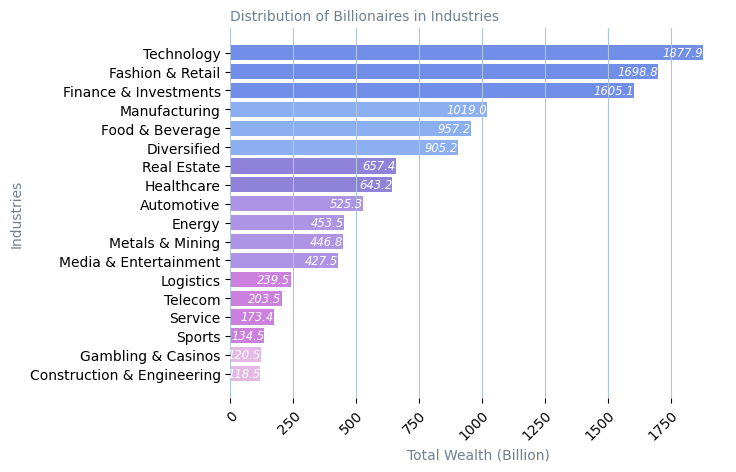

In [20]:
# Billionaires by industries --- bar chart
industries_df = full_df[['finalWorth','industries']].groupby('industries').sum()
industries_df = industries_df.sort_values(by = 'finalWorth', ascending = True)

colors = ['plum','plum','mediumorchid','mediumorchid','mediumorchid','mediumorchid',
          'mediumpurple','mediumpurple','mediumpurple','mediumpurple', 
          'slateblue','slateblue','cornflowerblue','cornflowerblue','cornflowerblue',
          'royalblue','royalblue','royalblue']
plt.barh(industries_df.index, industries_df['finalWorth'], color = colors, alpha = 0.75, align = 'center')
plt.title("Distribution of Billionaires in Industries", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion)", color = 'slategray',fontsize=10)
plt.ylabel("Industries", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# annotate()
for index, value in enumerate(industries_df['finalWorth']):
    plt.text(value, index, str(value), ha = 'right', va = 'center', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'white') 
    
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()


## Wealth Range of Billionaires by Gender

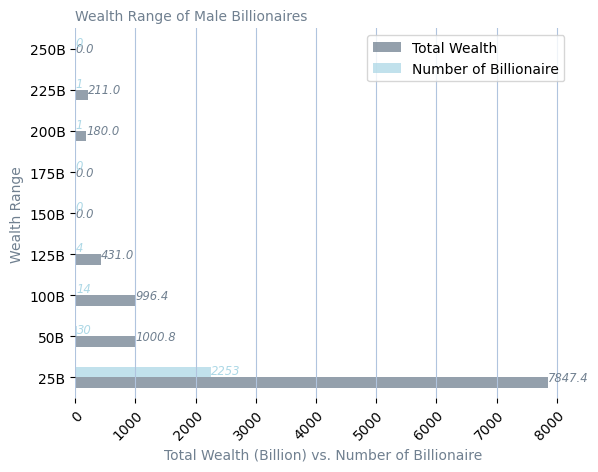

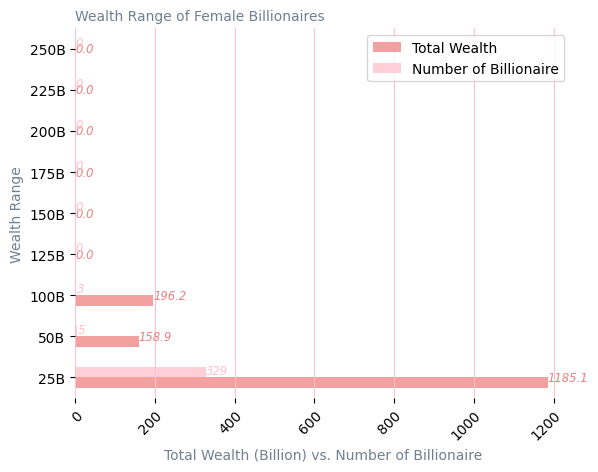

In [37]:
# Wealth range by gender 
# Female data
female_wealth_df = full_df[full_df['gender'] == 'F'][['finalWorth','rank']]
# Create bins
female_wealth_df['wealth_range']=''
bins = [0,25,50,100,125,150,175,200,225,250]
group_names = ['25B','50B','100B','125B','150B','175B','200B','225B','250B']
female_wealth_df["wealth_range"] = pd.cut(female_wealth_df["finalWorth"], 
                                    bins, labels = group_names, include_lowest=True)

# Aggregate sum and count in df
female_wealth_df = female_wealth_df.groupby('wealth_range')['finalWorth'].agg(['sum','count'])

# Male data
male_wealth_df = full_df[full_df['gender']=='M'][['finalWorth','rank']]
male_wealth_df['wealth_range']=''
bins = [0,25,50,100,125,150,175,200,225,250]
group_names = ['25B','50B','100B','125B','150B','175B','200B','225B','250B']
male_wealth_df["wealth_range"] = pd.cut(male_wealth_df["finalWorth"], 
                                    bins, labels = group_names, include_lowest=True)
# Aggregate sum and count in df
male_wealth_df = male_wealth_df.groupby('wealth_range')['finalWorth'].agg(['sum','count'])

# Male barh plot
male_wealth_df.plot.barh(color = ('slategrey','lightblue'), alpha = 0.75, align = 'center')
plt.title("Wealth Range of Male Billionaires", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion) vs. Number of Billionaire", color = 'slategray',fontsize=10)
plt.ylabel("Wealth Range", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.legend(labels = ('Total Wealth','Number of Billionaire'))
# annotate for total wealth
for index, value in enumerate(male_wealth_df['sum']):
    plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'slategrey') 
# annotate for count
for index, value in enumerate(male_wealth_df['count']):
    plt.text(value, index, str(value), ha = 'left', va = 'bottom', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'lightblue') 
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()    
    
# Female barh plot    
female_wealth_df.plot.barh(color = ('lightcoral','pink'), alpha = 0.75, align = 'center')

plt.title("Wealth Range of Female Billionaires", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion) vs. Number of Billionaire", color = 'slategray',fontsize=10)
plt.ylabel("Wealth Range", color = 'slategray', fontsize=10)
plt.grid(c="pink", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.legend(labels = ('Total Wealth','Number of Billionaire'))
# annotate for total wealth
for index, value in enumerate(female_wealth_df['sum']):
    plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'lightcoral') 
# annotate for count
for index, value in enumerate(female_wealth_df['count']):
    plt.text(value, index, str(value), ha = 'left', va = 'bottom', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'pink') 
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()



## Age Distributions of Billionaires by Gender

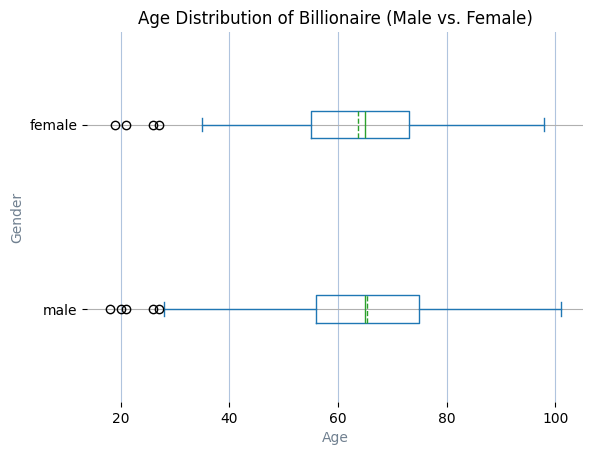

In [27]:
# Distribution of billionaires by gender and age
male_age = full_df[full_df['gender'] == 'M'][['finalWorth','age']].dropna()['age']
female_age = full_df[full_df['gender'] == 'F'][['finalWorth','age']].dropna()['age']
age = pd.DataFrame({'male':male_age, 
                    'female': female_age})
colors = ['steelblue','lightcoral']
age.plot(kind = 'box', title = 'Age Distribution of Billionaire (Male vs. Female)', 
         vert = False, showmeans = True, meanline = True, grid = True)
plt.xlabel("Age", color = 'slategray',fontsize=10)
plt.ylabel("Gender", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'x')

# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()

# Distribution of Billionaires in USA

## Billionaires in Top 20 US Cities

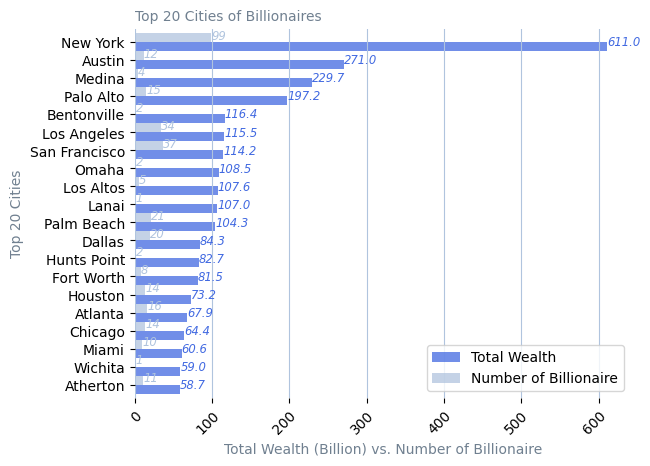

In [98]:
# Billionaires by USA cities --- bar chart
city_df = data_df[data_df['country']=='United States']
city_df = city_df[['rank','finalWorth','personName','city','industries', 'gender', 'age','selfMade']]

city_df.at[700,'city']='Pompano Beach'
city_df.at[1488,'city']='Boca Raton'
city_df.at[2213,'city']='Lone Pine'
city_df.at[2223,'city']='Virginia'

city_wealth_df = round(city_df[['finalWorth','city']].groupby('city').sum(),2)
city_count_df = city_df[['finalWorth','city']].groupby('city').count()
all_city_df = pd.merge(city_wealth_df, city_count_df, on = 'city', how = 'outer', suffixes = ('_value', '_count') )
all_city_df = all_city_df.sort_values(by = 'finalWorth_value', ascending = True)
top_city_df = all_city_df.tail(20)

# multi barh plot for top 20 cities
top_city_df.plot.barh(color = ('royalblue','lightsteelblue'), width = 1, alpha = 0.75, align = 'center')

plt.title("Top 20 Cities of Billionaires", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion) vs. Number of Billionaire", color = 'slategray',fontsize=10)
plt.ylabel("Top 20 Cities", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.legend(labels = ('Total Wealth','Number of Billionaire'))

# annotate for total wealth
for index, value in enumerate(top_city_df['finalWorth_value']):
    plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'royalblue') 
# annotate for count
for index, value in enumerate(top_city_df['finalWorth_count']):
    plt.text(value, index, str(value), ha = 'left', va = 'bottom', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'lightsteelblue') 
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

In [148]:
# Use API requests to draw cities distribution on USA map
city_df.groupby('city').sum().index

Index(['Abbeville', 'Adel', 'Afton', 'Alexandria', 'Alpine', 'Annapolis',
       'Arcadia', 'Aspen', 'Atherton', 'Atlanta',
       ...
       'Weston', 'Wichita', 'Wilson', 'Windermere', 'Winnetka', 'Woodside',
       'Wynnewood', 'Yorktown Heights', 'Youngstown', 'Ypsilanti'],
      dtype='object', name='city', length=271)

## Billionaires in US Industries

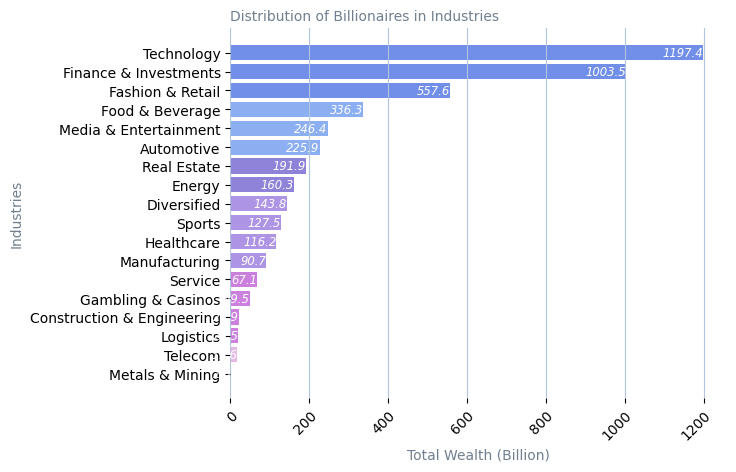

In [39]:
# Billionaires by industries --- bar chart
city_industries_df = city_df[['finalWorth','industries']].groupby('industries').sum()
city_industries_df = city_industries_df.sort_values(by = 'finalWorth', ascending = True)

colors = ['plum','plum','mediumorchid','mediumorchid','mediumorchid','mediumorchid',
          'mediumpurple','mediumpurple','mediumpurple','mediumpurple', 
          'slateblue','slateblue','cornflowerblue','cornflowerblue','cornflowerblue',
          'royalblue','royalblue','royalblue']
plt.barh(city_industries_df.index, city_industries_df['finalWorth'], color = colors, alpha = 0.75, align = 'center')
plt.title("Distribution of Billionaires in Industries", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion)", color = 'slategray',fontsize=10)
plt.ylabel("Industries", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# annotate()
for index, value in enumerate(city_industries_df['finalWorth']):
    plt.text(value, index, str(value), ha = 'right', va = 'center', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'white') 
    
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

## Wealth Range of US Billionaires by Gender

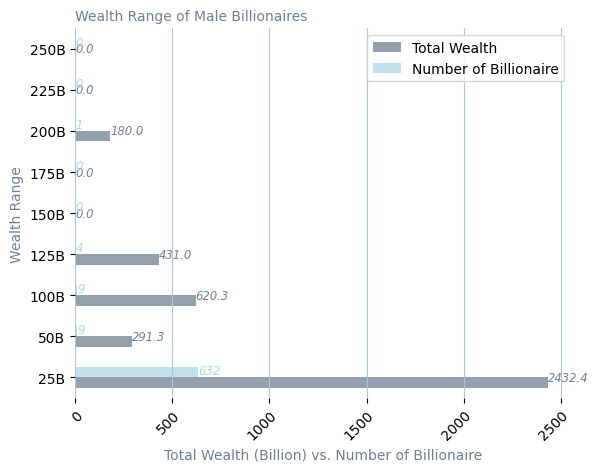

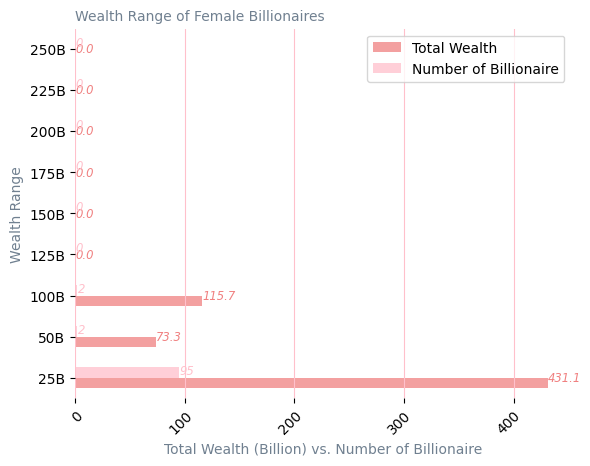

In [40]:
# Wealth range by gender 
# Female data
female_wealth_df = city_df[city_df['gender'] == 'F'][['finalWorth','rank']]
# Create bins
female_wealth_df['wealth_range']=''
bins = [0,25,50,100,125,150,175,200,225,250]
group_names = ['25B','50B','100B','125B','150B','175B','200B','225B','250B']
female_wealth_df["wealth_range"] = pd.cut(female_wealth_df["finalWorth"], 
                                    bins, labels = group_names, include_lowest=True)
# Aggregate sum and count in df
female_wealth_df = female_wealth_df.groupby('wealth_range')['finalWorth'].agg(['sum','count'])

# Male data
male_wealth_df = city_df[city_df['gender']=='M'][['finalWorth','rank']]
male_wealth_df['wealth_range']=''
bins = [0,25,50,100,125,150,175,200,225,250]
group_names = ['25B','50B','100B','125B','150B','175B','200B','225B','250B']
male_wealth_df["wealth_range"] = pd.cut(male_wealth_df["finalWorth"], 
                                    bins, labels = group_names, include_lowest=True)
# Aggregate sum and count in df
male_wealth_df = male_wealth_df.groupby('wealth_range')['finalWorth'].agg(['sum','count'])

# Male barh plot
male_wealth_df.plot.barh(color = ('slategrey','lightblue'), alpha = 0.75, align = 'center')
plt.title("Wealth Range of Male Billionaires", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion) vs. Number of Billionaire", color = 'slategray',fontsize=10)
plt.ylabel("Wealth Range", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.legend(labels = ('Total Wealth','Number of Billionaire'))
# annotate for total wealth
for index, value in enumerate(male_wealth_df['sum']):
    plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'slategrey') 
# annotate for count
for index, value in enumerate(male_wealth_df['count']):
    plt.text(value, index, str(value), ha = 'left', va = 'bottom', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'lightblue') 
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()    
    
# Female barh plot    
female_wealth_df.plot.barh(color = ('lightcoral','pink'), alpha = 0.75, align = 'center')

plt.title("Wealth Range of Female Billionaires", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Total Wealth (Billion) vs. Number of Billionaire", color = 'slategray',fontsize=10)
plt.ylabel("Wealth Range", color = 'slategray', fontsize=10)
plt.grid(c="pink", axis = 'x')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.legend(labels = ('Total Wealth','Number of Billionaire'))
# annotate for total wealth
for index, value in enumerate(female_wealth_df['sum']):
    plt.text(value, index, str(value), ha = 'left', va = 'center', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'lightcoral') 
# annotate for count
for index, value in enumerate(female_wealth_df['count']):
    plt.text(value, index, str(value), ha = 'left', va = 'bottom', style = 'oblique', 
             weight = 'medium', size = 'small', color = 'pink') 
# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

## Age Distributions of US Billionaires by Gender

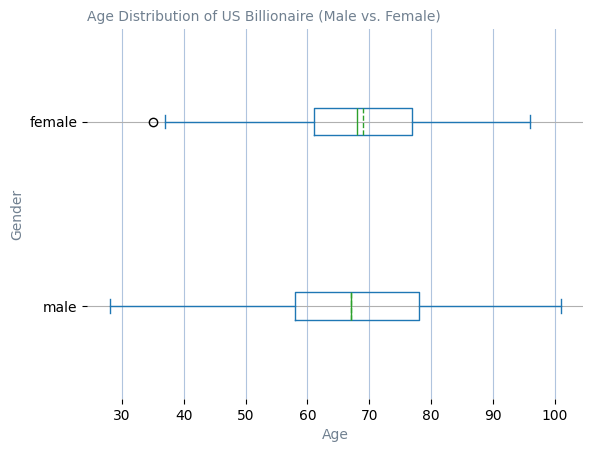

In [97]:
# Distribution of billionaires by gender and age
male_city_age = city_df[city_df['gender'] == 'M'][['finalWorth','age']].dropna()['age']
female_city_age = city_df[city_df['gender'] == 'F'][['finalWorth','age']].dropna()['age']
age = pd.DataFrame({'male':male_city_age, 
                    'female': female_city_age})
colors = ['steelblue','lightcoral']
age.plot(kind = 'box', vert = False, showmeans = True, meanline = True, grid = True)
plt.title('Age Distribution of US Billionaire (Male vs. Female)',color = 'slategray',loc='left',fontsize=10)
plt.xlabel("Age", color = 'slategray',fontsize=10)
plt.ylabel("Gender", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'x')

# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()

/var/folders/jn/000q98496_9_y7jg5hj5hvw40000gn/T/ipykernel_44620/991539808.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_industries_df['age_range']=''
/var/folders/jn/000q98496_9_y7jg5hj5hvw40000gn/T/ipykernel_44620/991539808.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_industries_df["age_range"] = pd.cut(age_industries_df["age"],


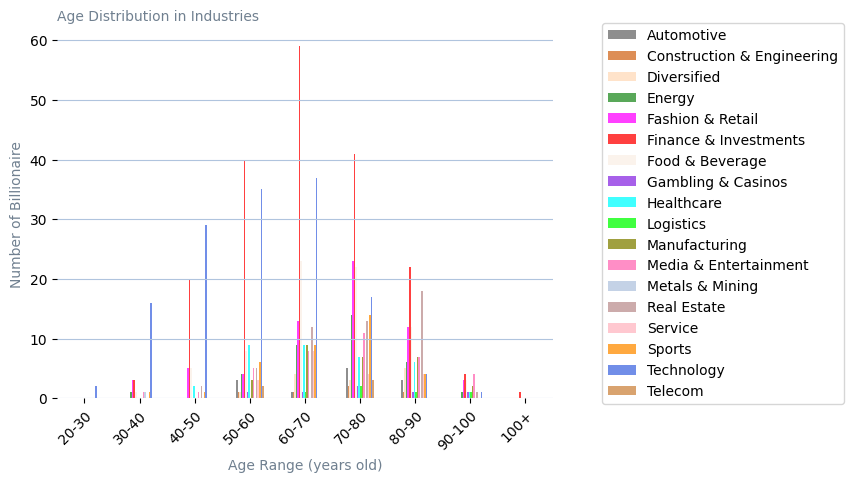

In [128]:
# Age distribution in Industry
age_industries_df = city_df[['age','industries','gender','finalWorth']]

# Create bins
age_industries_df['age_range']=''
bins = [0,20,30,40,50,60,70,80,90,100,110]
group_names = ['0-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100+']
age_industries_df["age_range"] = pd.cut(age_industries_df["age"], 
                                    bins, labels = group_names, include_lowest=True)

# Convert industries rows to columns
age_industries_df = age_industries_df[['age_range','industries']]
age_industries_df = pd.crosstab(age_industries_df.age_range, age_industries_df.industries)

# age vs. industries plot
colors = ['dimgrey','chocolate','peachpuff','forestgreen','fuchsia','red','linen',
         'blueviolet','aqua','lime','olive','hotpink','lightsteelblue','rosybrown','lightpink',
         'darkorange','royalblue','peru']
age_industries_df.plot.bar(color = colors, alpha = 0.75)
plt.title("Age Distribution in Industries", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Age Range (years old)", color = 'slategray',fontsize=10)
plt.ylabel("Number of Billionaire", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'y')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.legend(bbox_to_anchor=(1.6, 0.5), loc = 'right')


# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()    


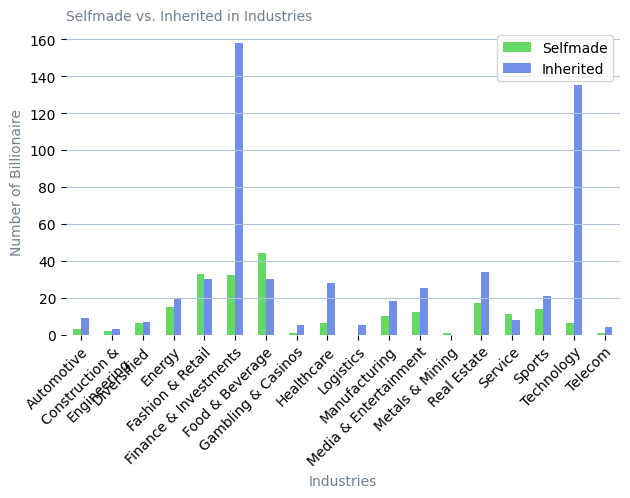

In [133]:
# US Selfmade billionaire vs. Inherited billionaire
selfmade_df = city_df[city_df['selfMade']==True][['finalWorth','gender','industries','age']]
inherited_df = city_df[city_df['selfMade']==False][['finalWorth','gender','industries','age']]
selfmade_df
# Selfmade distribution in Industry
selfmade_industries_df = city_df[['selfMade','industries','gender','finalWorth']]

# Convert industries rows to columns
selfmade_industries_df = selfmade_industries_df[['selfMade','industries']]
selfmade_industries_df = pd.crosstab(selfmade_industries_df.industries,selfmade_industries_df.selfMade)
selfmade_industries_df

# Selfmade vs. industries
colors = ['limegreen','royalblue']
selfmade_industries_df.plot.bar(color = colors, alpha = 0.75)
plt.title("Selfmade vs. Inherited in Industries", color = 'slategray', loc='left',fontsize=10)
plt.xlabel("Industries", color = 'slategray',fontsize=10)
plt.ylabel("Number of Billionaire", color = 'slategray', fontsize=10)
plt.grid(c="lightsteelblue", axis = 'y')
plt.xticks(rotation=45, rotation_mode="anchor", ha="right", wrap=True)
plt.legend(labels = ['Selfmade','Inherited'], loc = 'upper right')

# get rid of the frame lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()    

# Correlation Analysis of Billionaires

In [ ]:
# Billionaire vs. Countries GDP
full_df


In [ ]:
# Billionaire vs. Countries Life Expectancies

In [ ]:
# Billionaires vs. Countries Population


In [ ]:
# Billionaire vs. Countries CPI


In [ ]:
# Billionaire vs. Education


In [ ]:
# Billionaire vs. Gender

In [ ]:
# Billionaire vs. Age

In [ ]:
# Billionaire vs. Industries

# Bonus: The chances of you becoming a billionaire

In [ ]:
# We are only interested in selfmade billionaire for this part
# Y = billionaire/countries population %
# X = gender + country_gdp + age + industries

